## O'Hara Rudy Land

In [1]:
import utils
import matplotlib.pyplot as plt
import tqdm

-- The C compiler identification is AppleClang 14.0.0.14000029
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/finsberg/local/src/uio-digital-scholarship-days/single_cell/c/build_ORdmm_Land_em_coupling
[ 50%] Building C object CMakeFiles/ORdmm_Land_em_coupling.dir/demo.c.o
[100%] Linking C shared library lib/libORdmm_Land_em_coupling.dylib
[100%] Built target ORdmm_Land_em_coupling
Loaded ODE model 'ORdmm_Land_em_coupling' with:
     Num full states: 48
      Num parameters: 115
model.default_inital_states() = {'CaMKt': 0.0, 'hf': 1.0, 'hs': 1.0, 'hsp': 1.0, 'j': 1.0, 'jp': 1.0, 'm': 0.0, 'hL': 1.0, 'hLp': 1.0, 'mL': 0.0, 'a': 0.0, 'ap': 0.0, 'iF': 1.0, 'iFp': 1.0, 'iS': 1.0, 'iSp': 1.0, 'd': 0.0, 'fcaf': 1.0, 'fcafp': 1.

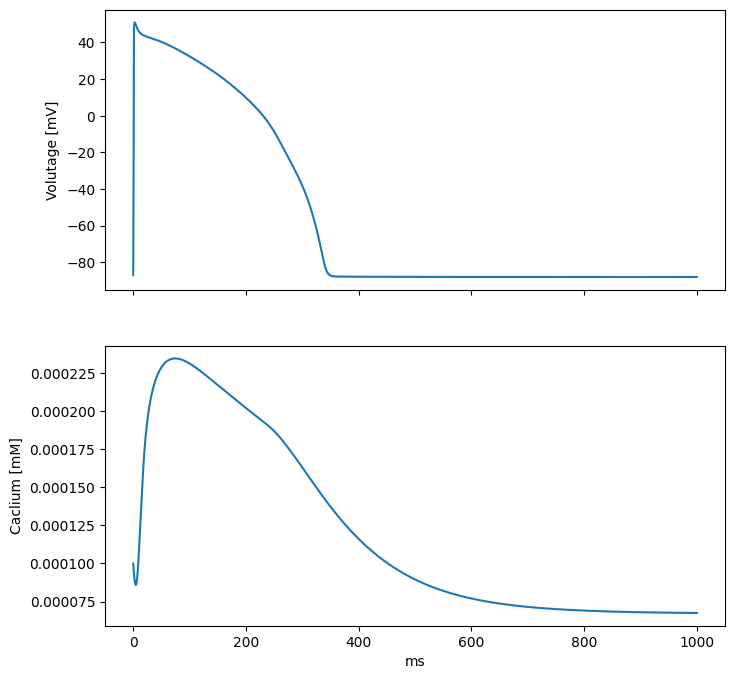

In [2]:
model_name = "ORdmm_Land"
model = utils.load_model(model_name)

# Print the states to find exact keys
print(f"{model.default_inital_states() = }")
# We want 'V' and 'Ca_i'

t_start = 0.0
t_end = 1000.0 # ms
dt = 0.1 # 0.1 ms
solution = model.solve(t_start=t_start, t_end=t_end, dt=dt)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
ax[0].plot(solution.time, solution["v"])
ax[1].plot(solution.time, solution["cai"])
ax[0].set_ylabel("Volutage [mV]")
ax[1].set_ylabel("Caclium [mM]")
ax[1].set_xlabel("ms")
plt.show()

-- The C compiler identification is AppleClang 14.0.0.14000029
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/finsberg/local/src/uio-digital-scholarship-days/single_cell/c/build_ORdmm_Land_em_coupling
[ 50%] Building C object CMakeFiles/ORdmm_Land_em_coupling.dir/demo.c.o
[100%] Linking C shared library lib/libORdmm_Land_em_coupling.dylib
[100%] Built target ORdmm_Land_em_coupling
Loaded ODE model 'ORdmm_Land_em_coupling' with:
     Num full states: 48
      Num parameters: 115
model.default_inital_states() = {'CaMKt': 0.0, 'hf': 1.0, 'hs': 1.0, 'hsp': 1.0, 'j': 1.0, 'jp': 1.0, 'm': 0.0, 'hL': 1.0, 'hLp': 1.0, 'mL': 0.0, 'a': 0.0, 'ap': 0.0, 'iF': 1.0, 'iFp': 1.0, 'iS': 1.0, 'iSp': 1.0, 'd': 0.0, 'fcaf': 1.0, 'fcafp': 1.

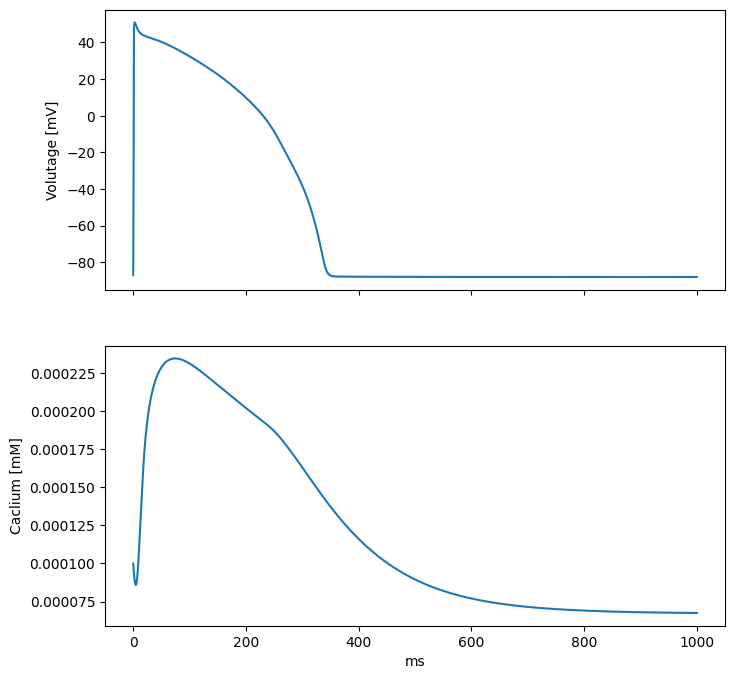

In [3]:
model_name = "ORdmm_Land_em_coupling"
model = utils.load_model(model_name)

# Print the states to find exact keys
print(f"{model.default_inital_states() = }")
# We want 'V' and 'Ca_i'

t_start = 0.0
t_end = 1000.0 # ms
dt = 0.1 # 0.1 ms
solution = model.solve(t_start=t_start, t_end=t_end, dt=dt)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
ax[0].plot(solution.time, solution["v"])
ax[1].plot(solution.time, solution["cai"])
ax[0].set_ylabel("Volutage [mV]")
ax[1].set_ylabel("Caclium [mM]")
ax[1].set_xlabel("ms")
plt.show()

In [4]:
u0 = model.initial_state_values()
num_beats = 10
dt = 0.02
t_start = 0.0
t_end = 1000.0

In [5]:
for i in tqdm.tqdm(range(num_beats)):
    sol = model.solve(t_start=t_start, t_end=t_end, dt=dt, u0=u0)
    u0 = sol.u[-1, :]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.80it/s]


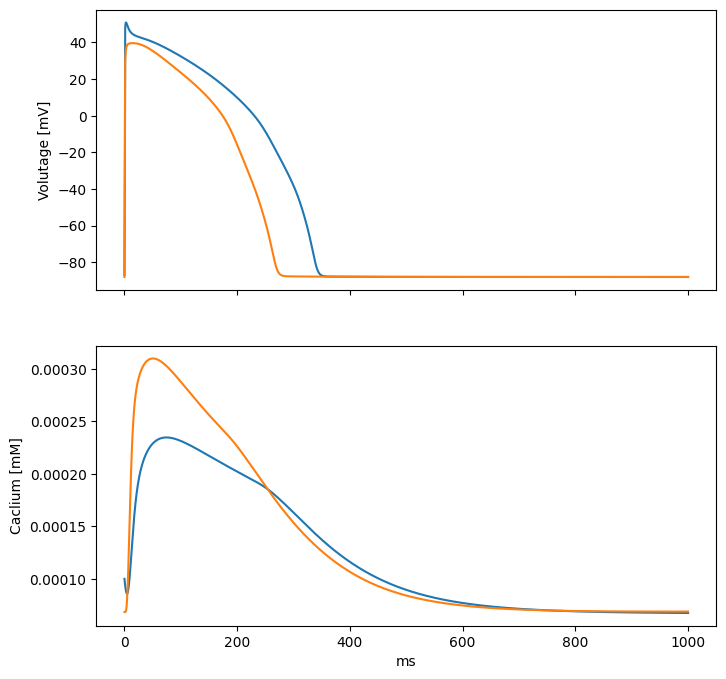

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
ax[0].plot(solution.time, solution["v"], label="beat 1")
ax[1].plot(solution.time, solution["cai"], label="beat 1")
ax[0].plot(sol.time, sol["v"], label="beat 10")
ax[1].plot(sol.time, sol["cai"], label="beat 10")
ax[0].set_ylabel("Volutage [mV]")
ax[1].set_ylabel("Caclium [mM]")
ax[1].set_xlabel("ms")
plt.show()

In [8]:
print(sol.montior_keys())

['vcell', 'Ageo', 'Acap', 'vmyo', 'vnsr', 'vjsr', 'vss', 'CaMKb', 'CaMKa', 'mss', 'tm', 'hss', 'thf', 'ths', 'Ahs', 'h', 'jss', 'tj', 'hssp', 'thsp', 'hp', 'tjp', 'fINap', 'INa', 'mLss', 'tmL', 'hLss', 'hLssp', 'thLp', 'GNaL', 'fINaLp', 'INaL', 'ass', 'ta', 'iss', 'tiF', 'tiS', 'AiF', 'AiS', 'i', 'assp', 'dti_develop', 'dti_recover', 'tiFp', 'tiSp', 'ip', 'fItop', 'Ito', 'dss', 'td', 'fss', 'tff', 'tfs', 'Afs', 'f', 'fcass', 'tfcaf', 'tfcas', 'Afcaf', 'Afcas', 'fca', 'tffp', 'fp', 'tfcafp', 'fcap', 'km2n', 'anca', 'PhiCaL', 'PhiCaNa', 'PhiCaK', 'PCa', 'PCap', 'PCaNa', 'PCaK', 'PCaNap', 'PCaKp', 'fICaLp', 'ICaL', 'ICaNa', 'ICaK', 'xrss', 'txrf', 'txrs', 'Axrf', 'Axrs', 'xr', 'rkr', 'GKr', 'IKr', 'xs1ss', 'txs1', 'xs2ss', 'txs2', 'KsCa', 'GKs', 'IKs', 'xk1ss', 'txk1', 'rk1', 'GK1', 'IK1', 'a_rel', 'Jrel_inf', 'tau_rel_tmp', 'tau_rel', 'btp', 'a_relp', 'Jrel_infp', 'tau_relp_tmp', 'tau_relp', 'fJrelp', 'Jrel', 'Bcass', 'Bcajsr', 'XS_max', 'XW_max', 'CaTrpn_max', 'kwu', 'ksu', 'Aw', 'As', 

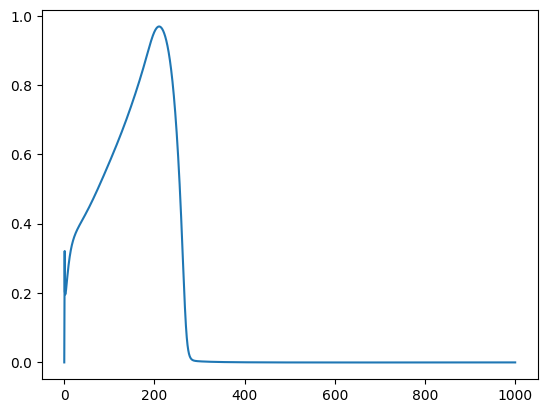

In [11]:
IKr = sol.monitored("IKr")
fig, ax = plt.subplots()
ax.plot(sol.time, IKr)
plt.show()

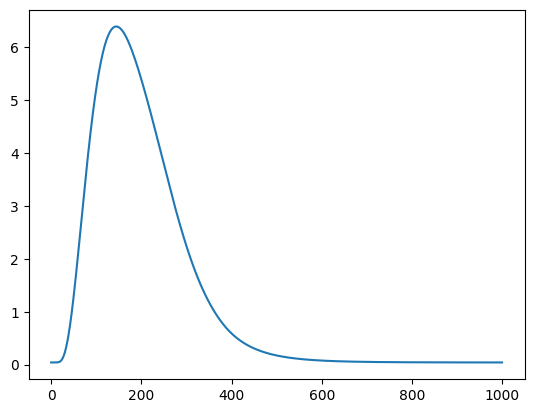

In [12]:
Ta = sol.monitored("Ta")
fig, ax = plt.subplots()
ax.plot(sol.time, Ta)
plt.show()